# Regularization
<hr style="border:2px solid black">

## 1. Introduction

### 1.1 What is regularization?

* Regularization is a set of techniques that constrain the complexity of models. They thus reduce the risk of overfitting and improve the ability of a model to generalize. in other words, We can use new models that are almost like Linear Regression but with a different loss function.

**GOAL OF USING REGULARIZATION MODELS**: Reduce Overtitting; and make our model more generalizable.

### 1.2 When to regularize:
* To reduce overfitting - check if you are overfitting via the usual methods:
    * cross validation
    * train/validation score differing

### 1.3 How to regularize:
* Perform the usual ML workflow, 
* Be sure to normalize your dataset before fitting (`sklearn.preprocessing.StandardScaler`)
* Now use a **regularization** model instead of a normal linear regression model

## 2. The maths 

### 2.1 LOSS FUNCTION 
#### Residual Sum of Squares (RSS) is just Mean Squared Error without the Mean!

$$
MSE = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y})^2 
$$

$$
RSS = \sum_{i=1}^N (y_i - \hat{y})^2 
$$


#### Which we can rewrite by substituting the linear regression equation in for yhat

$ \hat{y} = w_0 + [w_1x_1 + ... + w_nx_n] $ 

$ m = slope, w_0 = intercept $

$$
\hat{y} = (w_0 + \sum_{j=1}^M w_j x_j)
$$

$$
RSS = \sum_{i=1}^N (y_i - (w_0 + \sum_{j=1}^M w_j x_{j}))^2 
$$

*`j=1 -> M` - no. of features (cols in the dataframe)*

*`i=1 -> N` - no. of data points (rows in the dataframe)*

## Regularisation means adding an extra penalty to RSS

### 2.2 Ridge regression 


* Add a penalising term that shrinks the **square of the weights**

* Controled by a regularising term `alpha`

* `alpha` is a **hyperparameter** that we set when we instantiate the model - if alpha is zero, Ridge becomes vanilla Linear Regression

* large loss (big outliers in some feature) in a feature that is useful as predictor (large weight) create MASSIVE Ridge losses 

* How does Ridge handle this - reduces the coefficient for that X feature to a low number

* Ridge is also called `L2` regularization


$$
Ridge = \sum_{i=1}^N (y_i - (w_0 + \sum_{j=1}^M w_j x_{j}))^2  + \sum_{j=1}^M \alpha w_i^2
$$

### 2.3 Lasso regression 

* Add a penalising term that shrinks the **absolute value of the weights**

* Controled by a regularising term `alpha`

* Tends to result in the coefficients for many features becoming zero (in ridge they become close to zero, but tend not to be zero)

* Lasso is also called `L1` regularization

$$
Lasso = RSS + \sum_{i=1}^M \alpha \vert w_i \vert
$$

### 2.4 Mix Lasso and Ridge with `ElasticNet`
* Combine L1 (Lasso) and Ridge (L2) by setting the `l1_ratio` 
* l1_ratio = lasso / lasso + ridge

### Additional Reading

[StatQuest on Lasso](https://www.youtube.com/watch?v=NGf0voTMlcs)  
[StatQuest on Ridge](https://www.youtube.com/watch?v=Q81RR3yKn30)  
[StatQuest on ElasticNet](https://www.youtube.com/watch?v=1dKRdX9bfIo)  

<hr style="border:2px solid black">

## 2. Lets implement!

In [1]:
# data analysis and visualization stack
import numpy as np
import matplotlib.pyplot as plt

# machine learning stack
from sklearn.linear_model import LinearRegression

Create data following $\sqrt{x}$ 

In [2]:
# specify a random state
np.random.seed(13)

In [3]:
# create a data set fluctuating around squre root of x
X=np.arange(1,60, 5) # from 1 to 60 in steps of 6
y=[np.sqrt(xi)+np.random.normal(0, 0.5) for xi in X]

In [4]:
X

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56])

In [5]:
y

[0.643804668974706,
 2.8263729321130295,
 3.2943732511863733,
 4.2259061693728945,
 5.255126549181345,
 5.365188457740057,
 6.242858312691284,
 6.43060568708466,
 7.1424671061507965,
 6.259641417856001,
 6.746933916067076,
 6.852511800888348]

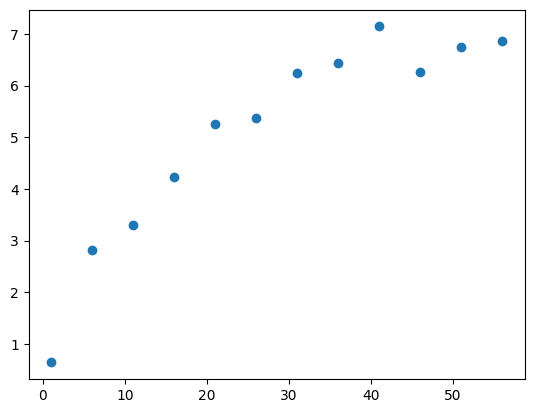

In [6]:
plt.scatter(X,y)

In [7]:
X

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56])

In [8]:
X.shape

(12,)

In [9]:
# reshape the X to a 2D array for later use in sklearn mdels
X=X.reshape(-1,1)
X.shape

(12, 1)

In [10]:
X

array([[ 1],
       [ 6],
       [11],
       [16],
       [21],
       [26],
       [31],
       [36],
       [41],
       [46],
       [51],
       [56]])

### Underfitting (high bias)

In [11]:
# fit linear regression on the data
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [12]:
# predict y by lr model
y_pred=model.predict(X)

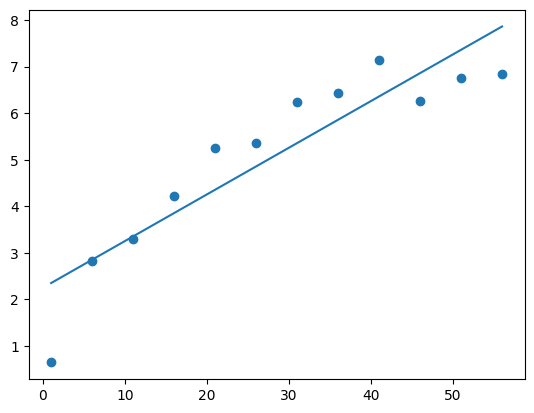

In [13]:
# plot both linear regression line and the original data
plt.scatter(X,y)
plt.plot(X, y_pred)

### Underfitting:

To see if you got an underfitting model, compare the scores:       
`model.score(X_train, y_train)`    
`model.score(X_test, y_test)`
     
If both scores are weak, you have probably an underfit situation
     
How could it happen?
 * Small data sets 
 * Weak feature engineering
     * Too little features
     * Features uninformative

### Overfit

In [14]:
# additional pakages from sklearn for adding more terms to the equation
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# convert the feature matrix to a polynomial form with the degree of 10
poly=PolynomialFeatures(degree=10, include_bias=False)
X_poly=poly.fit_transform(X)

In [16]:
X_poly.shape

(12, 10)

In [17]:
X_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [6.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.29600000e+03,
        7.77600000e+03, 4.66560000e+04, 2.79936000e+05, 1.67961600e+06,
        1.00776960e+07, 6.04661760e+07],
       [1.10000000e+01, 1.21000000e+02, 1.33100000e+03, 1.46410000e+04,
        1.61051000e+05, 1.77156100e+06, 1.94871710e+07, 2.14358881e+08,
        2.35794769e+09, 2.59374246e+10],
       [1.60000000e+01, 2.56000000e+02, 4.09600000e+03, 6.55360000e+04,
        1.04857600e+06, 1.67772160e+07, 2.68435456e+08, 4.29496730e+09,
        6.87194767e+10, 1.09951163e+12],
       [2.10000000e+01, 4.41000000e+02, 9.26100000e+03, 1.94481000e+05,
        4.08410100e+06, 8.57661210e+07, 1.80108854e+09, 3.78228594e+10,
        7.94280047e+11, 1.66798810e+13],
       [2.60000000e+01, 6.76000000e+02, 1.75760000e+04, 4.56976000e+05,
   

In [18]:
# fit the linear regression model on X_poly
model=LinearRegression()
model.fit(X_poly,y)
y_pred_poly=model.predict(X_poly)

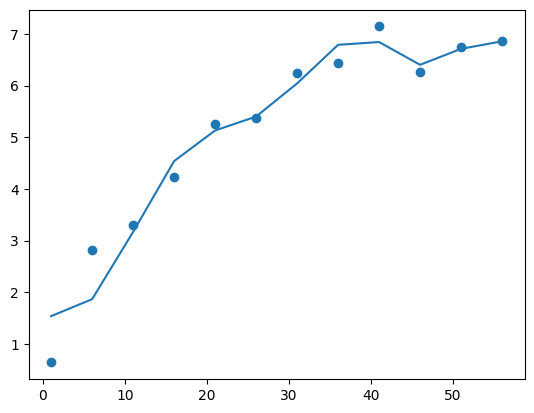

In [19]:
# plot the fitted line and original data
plt.scatter(X,y)
plt.plot(X,y_pred_poly)

### Overfitting: 
To see if you got an overfitting model, compare the scores:     
 `model.score(X_train, y_train)`    
 `model.score(X_test, y_test)`
     
If the train score is exceptionally good and the test score is weak, you probably have an overfit situation

In [20]:
# importing new packages for lasso, ridge and elasticnet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [21]:
# naming new models
lasso=Lasso()
ridge=Ridge()
elast=ElasticNet()

In [22]:
# fitting new models on X_poly
lasso.fit(X_poly, y)
ridge.fit(X_poly, y)
elast.fit(X_poly, y)

/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.09233e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.673e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

If the model does not converge, the gradient did not reduce under the set tolerance during the set maximal iteration steps. This can happen easily with regularization, still you can try the following:     
* increase `max_iter` (maybe some more steps help)
* increase `tol` (being more generous could help)   

Both measures should be taken carefully since it could increase the optimization time or make the results worst

In [23]:
# calculate y_pred by new models
y_lasso=lasso.predict(X_poly)
y_ridge=ridge.predict(X_poly)
y_elast=elast.predict(X_poly)

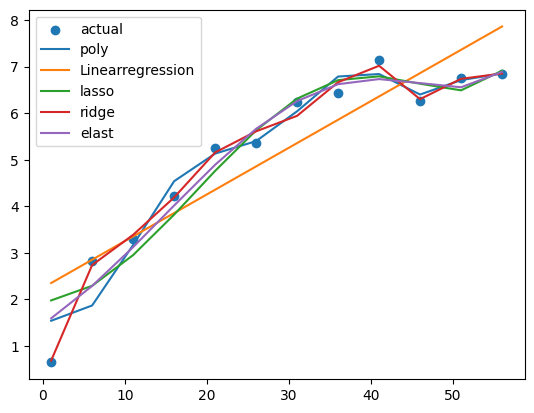

In [33]:
# plot all the models and comparing them
plt.scatter(X,y, label='actual')
plt.plot(X, y_pred_poly, label='poly')
plt.plot(X, y_pred, label='Linearregression')
plt.plot(X, y_lasso, label='lasso')
plt.plot(X, y_ridge, label='ridge')
plt.plot(X, y_elast, label='elast')
plt.legend()

In [25]:
lasso.coef_

array([ 0.00000000e+00,  1.00137732e-02, -1.65362515e-04, -5.55518071e-07,
        1.72286622e-09,  6.96619016e-11,  1.14617517e-12,  1.54357341e-14,
        1.80163388e-16,  1.64757212e-18])

In [26]:
ridge.coef_

array([ 9.21409809e-02,  2.11212335e-01, -4.85566101e-02,  4.93775305e-03,
       -2.72117708e-04,  8.63400444e-06, -1.56311664e-07,  1.46436852e-09,
       -4.80665018e-12, -9.04190047e-15])

### Additional Reading
[Regularization in Machine Learning](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)

<hr style="border:2px solid black">

## 3. Your Task

In [40]:
# check the lasso and Ridge results by changing the hyperparameter
for i in [0.1, 1, 10, 100, 1000]:
    lasso=Lasso(alpha=i) # 1, 10, 100, 1000
    
    lasso.fit(X_poly, y)
    
    print('lasso + i=',i, ':  ', lasso.coef_)
    
for i in [0.1, 1, 10, 100, 1000]:
   
    ridge=Ridge(alpha=i) # 1, 10, 100, 1000
    
    ridge.fit(X_poly, y)

    print('ridge + i=',i, ':  ', ridge.coef_)

lasso + i= 0.1 :   [ 2.45210747e-01 -1.92797995e-03 -9.51903026e-06 -6.50226890e-08
 -1.71101817e-09 -2.08510375e-11 -4.71739961e-14  4.63849372e-15
  1.51845047e-16  3.35747301e-18]
lasso + i= 1 :   [ 0.00000000e+00  1.00137732e-02 -1.65362515e-04 -5.55518071e-07
  1.72286622e-09  6.96619016e-11  1.14617517e-12  1.54357341e-14
  1.80163388e-16  1.64757212e-18]
lasso + i= 10 :   [ 0.00000000e+00  8.85998538e-03 -1.13117060e-04 -1.16050890e-06
  1.06813308e-10  8.23745236e-11  1.45843983e-12  1.89416858e-14
  1.93821038e-16  1.11913698e-18]
lasso + i= 100 :   [ 0.00000000e+00  0.00000000e+00  2.77863689e-04 -4.46804044e-06
 -2.70002384e-08 -4.54845629e-11  1.94473558e-12  4.71104273e-14
  7.93341698e-16  1.15182131e-17]
lasso + i= 1000 :   [ 0.00000000e+00  0.00000000e+00  1.93234342e-04 -1.26042410e-06
 -4.88792098e-08 -2.15869935e-10  8.29594352e-13  4.63878540e-14
  9.67456925e-16  1.63446080e-17]
ridge + i= 0.1 :   [ 1.86088259e-01  2.09095710e-01 -5.33146466e-02  5.81749974e-03
 -3

/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e-01, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.661e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/home/kith/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.729e+